In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [2]:
df = pd.read_csv('productividad/productivity.csv')
df.head()

,[run number],maximum-sugar-endowment,minimum-sugar-endowment,visualization,initial-population,[step],avg-gini,starvation,avg-productivity,total-wealth
0,1,0,0,color-agents-by-decile,400,0,0.0,0,0.0,0
1,2,0,10,color-agents-by-decile,400,0,0.0,0,0.0,0
2,3,0,20,color-agents-by-decile,400,0,0.0,0,0.0,0
3,4,0,30,color-agents-by-decile,400,0,0.0,0,0.0,0
4,5,0,40,color-agents-by-decile,400,0,0.0,0,0.0,0


In [3]:
df = df.drop(columns='visualization')
df = df.drop(df[df['[step]'] == 0].index) # aquellas runs que no se iniciaron
df = df.drop(columns='[run number]')
df = df.drop(columns='initial-population') #poblacion fija
df = df.drop(columns='[step]') # en este punto, todas las runs son validas y llegaron a la it final
df

,maximum-sugar-endowment,minimum-sugar-endowment,avg-gini,starvation,avg-productivity,total-wealth
21,10,0,0.505955,6322,41.390950,16034
42,20,0,0.476398,5440,42.374600,16328
43,20,10,0.467143,4745,45.700650,18057
63,30,0,0.476218,4761,44.283125,17857
64,30,10,0.456689,4238,45.599350,18374
...,...,...,...,...,...,...
435,200,150,0.190918,400,171.173825,67885
436,200,160,0.199800,372,176.193525,68841
437,200,170,0.185262,346,178.665475,71519
438,200,180,0.176211,325,187.057250,74191


In [4]:
#df.info()
#df.describe()
#df.columns
df.shape

(210, 6)

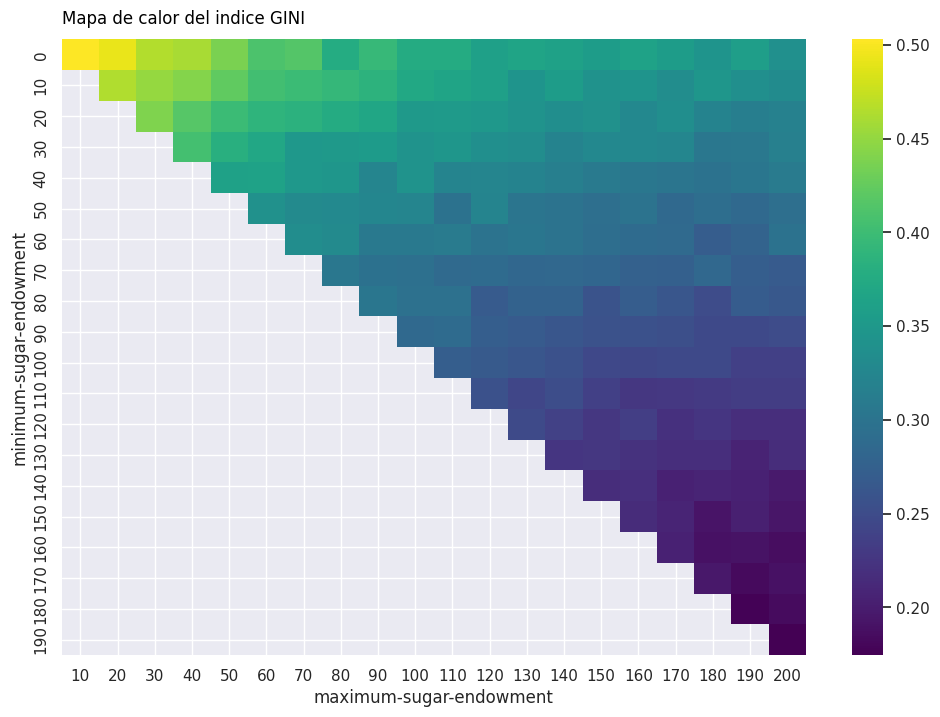

In [13]:
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-gini")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor del indice GINI', fontsize=12, color='black', ha='left')
plt.savefig('Mapa de calor GINI.png',dpi=300, bbox_inches='tight')
plt.show()

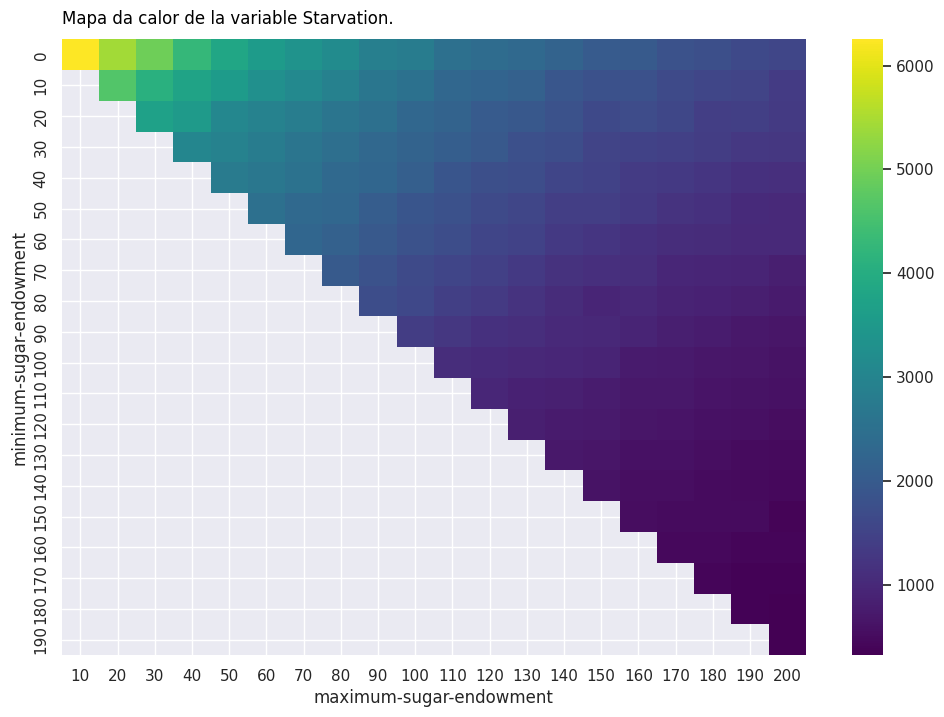

In [14]:

#La visualizacion del valor starvation ahora es mejor
plt.figure(figsize=(12, 8)) 
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="starvation")
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa da calor de la variable Starvation.', fontsize=12, color='black', ha='left')
plt.savefig('Mapa de calor Starvation.png',dpi=300, bbox_inches='tight')
plt.show()

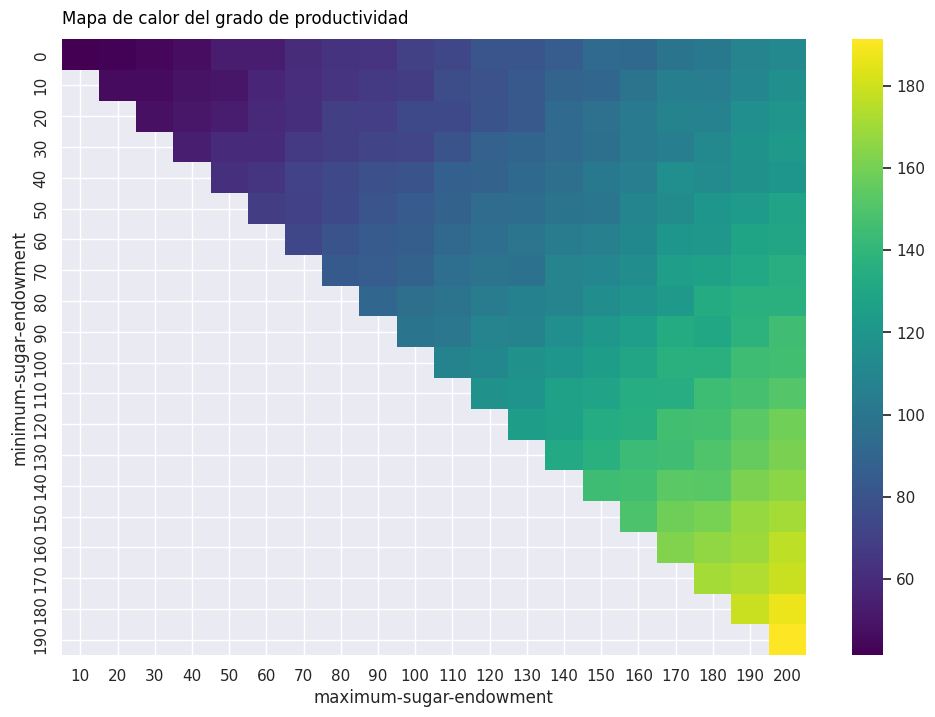

In [5]:
datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values="avg-productivity")
plt.figure(figsize=(12, 8)) 
sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
plt.text(0, -0.5, 'Mapa de calor del grado de productividad', fontsize=12, color='black', ha='left')
plt.savefig('figuras/Mapa de calor productividad.png',dpi=300, bbox_inches='tight')
plt.show()

In [6]:
correlacion = df['avg-gini'].corr(df['avg-productivity'])
print(f"La correlación entre el coeficiente GINI y la productividad es de: {correlacion}")
correlacion = df['avg-gini'].corr(df['starvation'])
print(f"La correlación entre el coeficiente GINI y starvation es de: {correlacion}")
correlacion = df['starvation'].corr(df['avg-productivity'])
print(f"La correlación entre starvation y la productividad es de: {correlacion}")


La correlación entre el coeficiente GINI y la productividad es de: -0.9387311587959669
La correlación entre el coeficiente GINI y starvation es de: 0.9467550731082013
La correlación entre starvation y la productividad es de: -0.9068587751699908
